<a href="https://colab.research.google.com/github/ankitrijal2054/CPSMA-441301/blob/main/Copy_of_Interpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 5: Interpolation

$Ankit Rijal$

$Min Sun Kim$

$Tylar Gifford$

$CPSMA - 441301$

$Dr. Nicolas Jacob$

First, I am going to import Gauss-Jordan algorithm from our previous project. 

In [135]:
#importing necessary modules
import math
import numpy as np
import scipy.linalg as la

def swap(matrix, row1, row2):
  swapped_matrix = []
  size = len(matrix)      #to find the size of a matrix
  for i in range(size):   #using loop to go through each row
    if i == row1:
      swapped_matrix.append(matrix[row2,:])   
    elif i == row2:
      swapped_matrix.append(matrix[row1,:])
    else:
      swapped_matrix.append(matrix[i,:])
  return np.array(swapped_matrix)


def add_rows(matrix, target_row, adding_row, multiplier):
  added_matrix = []
  size = len(matrix)
  for i in range(size):   #using loop to go through each row
    if i == target_row:
      old_row = matrix[target_row,:]
      adding_values = multiplier * matrix[adding_row,:]
      new_row = old_row + adding_values
      added_matrix.append(new_row)
    else:
      added_matrix.append(matrix[i,:])
  return np.array(added_matrix)

def multiply(matrix, target_row, constant):
  new_matrix = []
  size = len(matrix)
  for i in range(size):   #using loop to go through each row
    if i == target_row:
      new_matrix.append(constant * matrix[target_row,:])
    else:
      new_matrix.append(matrix[i,:])
  return np.array(new_matrix)

def max_value_row(matrix, column):
  col = matrix[column:,column]
  max = 0
  for i in range(len(col)):
    if col[max] < col[i]:
      max = i
  max_row = max + column
  return max_row

def gaussJordan(matrix):
  for i in range(len(matrix)):  #using loop to go through each row
    pos = max_value_row(matrix, i)  #using max_value_row function to find the row with largest leftmost value   
    matrix = swap(matrix, pos, i)   #swapping current row with row found on previous step   
    constant = 1/matrix[i,i]        
    matrix = multiply(matrix,i,constant)  #using multiply function to make the diagonal 1
    for column in range(0,i):             
      matrix = add_rows(matrix,column,i,-matrix[column,i])    #using add_rows function to make all values except diagonal 0
    for column in range(i+1,len(matrix)):
      matrix = add_rows(matrix,column,i,-matrix[column,i])    #using add_rows function to make all values except diagonal 0
  return np.array(matrix)

##Direct Method
Direct Method can be used to find the interpolation of the given points. The polynomial function on those points is denoted by the form:
$$
f(x) = a_0+a_1x+a_2x^2+\cdots + a_n x^n
$$

Let's assume, the passing points on the function is $(x_0,y_0)$. Substituting the points on the function, our function will be:

$$
a_0+a_1x_0+a_2 x_0^2+\cdots +a_n x_0^n = y_0
$$


Lets arrange them in matrix in order to apply the gaussian elimination.

$$
\left[
\begin{array}{ccccc|c}
1&x_0&x_0^2&\cdots&x_0^n&y_0\\
\vdots&&\ddots&&\vdots\\
1&x_{n-1}&x_{n-1}^2&\dots& x_{n-1}^n&y_{n-1}
\end{array}
\right]
$$
Now we can use the Gaussian Elimination method on the above matrix to solve the function.

##Function used: 
We are going to use the function below for our demonstration.
$$
2x^3+3x^2-4x+10
$$
We solved the above equation as x = 0,1,2,3 and 4. So, out data set will be
$$
[[0,10],[1,11],[2,30],[3,79],[4,170]]
$$

In [136]:
data =[[0,10],[1,11],[2,30],[3,79],[4,170]]

Now, I am going to list some functions for direct method of interpolation. 

In [137]:
def createRow(input,output,order): #function to create a row using each data points and order of polynomial
  array = []
  for i in range(order+1):
    array.append(input**i)
  array.append(output)
  return array

def create_matrix(data): #function to create a matrix using all the row created from each data points
  matrix = []
  order = len(data)-1
  for i in range(len(data)):
    matrix.append(createRow(data[i][0],data[i][1],order))
  return np.array(matrix)


In [138]:
def direct_interpolation(data):
  answer = gaussJordan(create_matrix(data))[:,-1] #gives the last column of the matrix returned by gauss jordan method
  end = -len(answer)-1
  degree = len(answer)-1
  function = ''
  super_map = {"0": "⁰", "1": "¹", "2": "²", "3": "³", "4": "⁴", "5": "⁵", "6": "⁶", "7": "⁷", "8": "⁸", "9": "⁹"}   #superscript to use while displaying our function to make it look nice

  for i in range(-1,end,-1):    #loop to use all the cofficient to make a polynomial function
    power = super_map.get(str(degree))
    function += f"+ ({(answer[i])})x{power} "
    degree -= 1

  print("The function is:")
  print(function)


Now, lets use the function to find the polynimial passing through our data points.

In [139]:
direct_interpolation(data)

The function is:
+ (0.0)x⁴ + (2.0)x³ + (3.0)x² + (-4.0)x¹ + (10.0)x⁰ 


Lets create a direct spline function to find f(x) for each x value using the given data points.

In [140]:
def direct_spline(data, x_value): #function to find f(x) for each x using only the data points.
  coefficient = gaussJordan(create_matrix(data))[:,-1]
  answer = 0
  for i in range(len(coefficient)):
    value = coefficient[i]*(x_value)**i
    answer += value
  return answer

In [141]:
direct_spline(data, 3)

79.0

Text(0.5, 1.0, 'Direct_spline Graph')

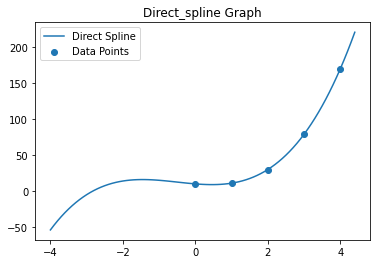

In [142]:
from matplotlib import pyplot as plot

import numpy as npy

x = npy.arange( -4,4.5,.1)

fig, ax = plot.subplots()

ax.plot(x, direct_spline(data, x), label='DS')

ax.scatter(npy.array(data)[:,0],npy.array(data)[:,1])

ax.legend(["Direct Spline", "Data Points"])

ax.set_title('Direct_spline Graph')

###Linear Splines

Splines are the piecewise functions of interpolation and the linear splines represent a set of line segments between the two adjacent data points.
So, to find a linear spline, first we need to divide the limit of polynomial into equal interval.
$$
$$
Let's create a function to create a equal interval points. 

In [143]:
import numpy as np
import math

def even_interval(function,lower,upper,numberOfDivisions): #function to divide the limit into equal interval
  interval = (upper - lower)/(numberOfDivisions - 1)
  points = []
  for i in range(numberOfDivisions):
    x_value = lower + i*interval
    points.append([x_value,function(x_value)])
  return np.array(points)

def slope(init_point, final_point): #function to calculate slope
  return (final_point[1]-init_point[1])/(final_point[0]-init_point[0])

Now, let's make a function to calculate linear spline using above function.

In [144]:
def linerSpline(points,input):
  x = points[:,0]
  y = points[:,1]
  for i in range(len(x)-1):
    if (x[i]< input) & (input < x[i+1]):
      return y[i]+ slope(points[i,:],points[i+1,:])*(input - x[i])
    else:
      continue

In [145]:
points = even_interval(np.cos,0,2*np.pi,5)

linerSpline(points,1)

0.36338022763241873

Let's create a graph of the function and linear spline using the five points we used above.

In [146]:
x = np.arange(0,6.35,0.1)
y = [linerSpline(points,x) for x in x]

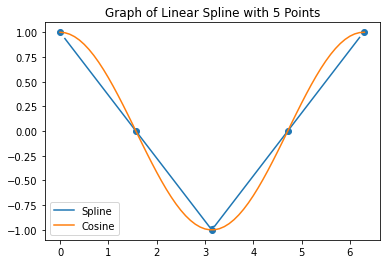

In [147]:
plot.scatter(points[:,0],points[:,1])
plot.plot(x,y)
plot.plot(x, np.cos(x))
plot.title('Graph of Linear Spline with 5 Points')
plot.legend(['Spline','Cosine'])


plot.show()

Now, let's try to create a similar graph but insted of 5 points, lets use 20 points. 

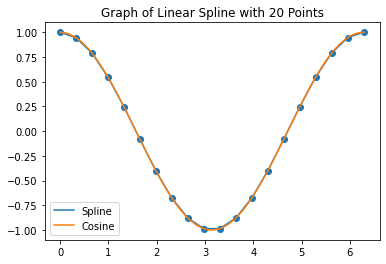

In [148]:
twentypoints = even_interval(np.cos,0,2*np.pi,20)
x = np.arange(0,6.35,0.1)
y = [linerSpline(twentypoints,x) for x in x]
plot.scatter(twentypoints[:,0],twentypoints[:,1])
plot.plot(x,y)
plot.plot(x, np.cos(x))
plot.title('Graph of Linear Spline with 20 Points')
plot.legend(['Spline','Cosine'])


plot.show()

Looking at the graph, we can conclude that the accuracy of linear spline graph increase as we increase the number of interval between the point

Now let's graph the direct spline with those 20 points and this time let's increase the windows of the graph. 

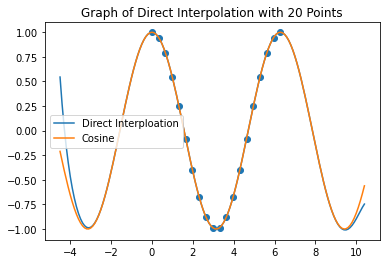

In [149]:
x = np.arange(-4.5,10.5,0.1)

plot.scatter(twentypoints[:,0],twentypoints[:,1])
plot.plot(x,direct_spline(twentypoints,x))
plot.plot(x, np.cos(x))
plot.title('Graph of Direct Interpolation with 20 Points')
plot.legend(['Direct Interploation','Cosine'])

As we can see on the graph above, the graph of direct interpolation starts to deviate from the graph of function as we extend the window of the graph.